In [3]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'BostonHousing.csv'
import pandas as pd

In [38]:
data=pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
array = data.values


In [7]:
X = array[:,0:13]
Y = array[:,13]


In [13]:
from sklearn.cross_validation import train_test_split


C:\Users\home\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
Dtree=DecisionTreeRegressor()

In [28]:
Dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
Dtree.feature_importances_

array([  8.48392289e-02,   1.55798861e-04,   7.48936793e-03,
         1.96623162e-05,   6.75420835e-03,   5.98887498e-01,
         1.40842770e-02,   5.91498773e-02,   1.82406717e-03,
         1.12722100e-02,   2.88200019e-02,   1.09510566e-02,
         1.75752745e-01])

In [52]:
Dtree.score(x_test,y_test)
yhat=Dtree.predict(x_test)

In [49]:
import matplotlib.pyplot as plt

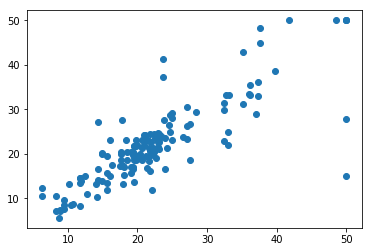

In [53]:
plt.scatter(yhat,y_test) 

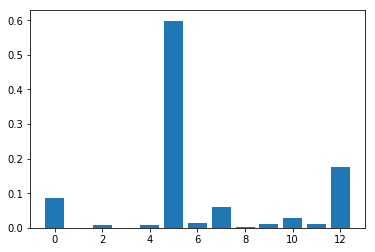

In [37]:
plt.bar(range(len(Dtree.feature_importances_)), Dtree.feature_importances_)
plt.show()

In [39]:
from sklearn.svm import SVR

In [41]:
svr=SVR()

In [42]:
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred=svr.predict(x_test)

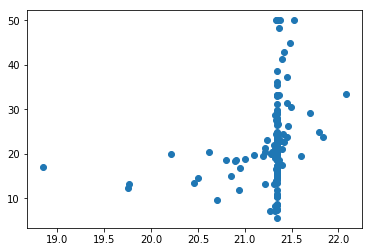

In [44]:
plt.scatter(y_pred,y_test) 

In [47]:
svr.score(x_test,y_test)

0.010181065799472755

In [48]:
kfold = KFold(n_splits=10, random_state=7)
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())


-91.0478243332
